<a href="https://colab.research.google.com/github/Yeehui13/Assignment-2/blob/main/BI_Assignment_(Lim_Yee_Hui_1002164609).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Neccesary Libraries and Dataset

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

In [ ]:
#import files
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
# Load dataset
dataSet =  pd.read_csv('/content/Housing.csv')

#Exploratory Data Analysis (EDA)

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
dataSet.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataSet.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
dataSet.describe().round(2)

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
dataSet.shape

(545, 13)

In [ ]:
# Checking for null values
dataSet.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#check for duplicate
dataSet.deuplicate().sum()

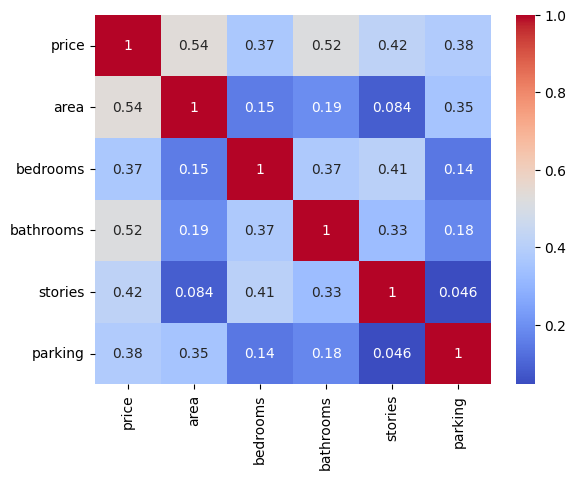

In [ ]:
# Heatmap of correlation matrix
correlation_matrix = dataSet.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

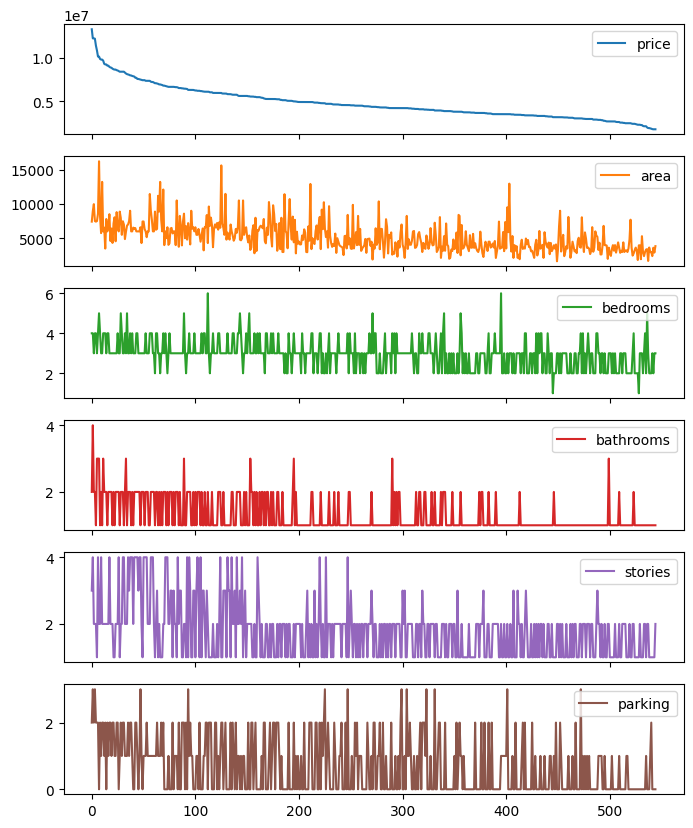

In [ ]:
dataSet.plot(figsize=(8, 10),subplots=True); #EDA

#Universal analysis (Challenge Part)

Numerical Variables

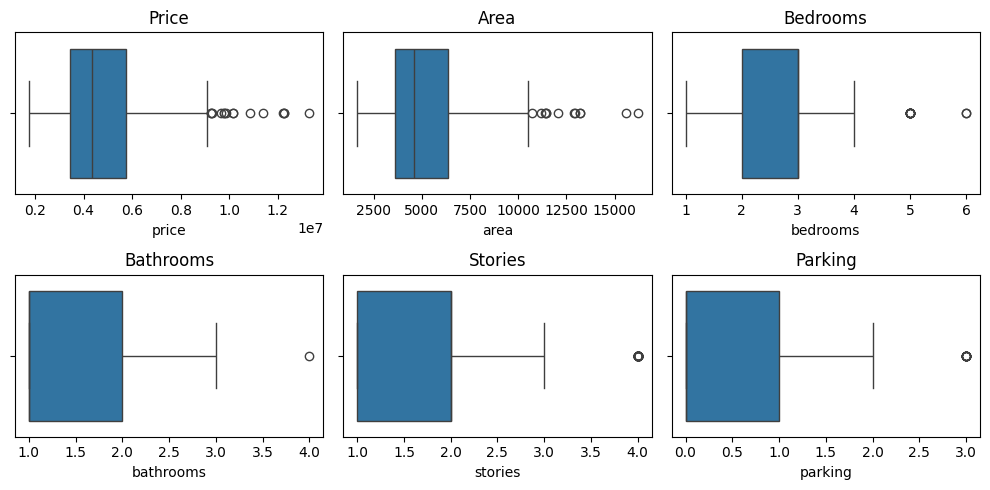

In [ ]:
# Plotting boxplots of numeric variables
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axs = plt.subplots(2, 3, figsize = (10, 5))

for i, attr in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data = dataSet[attr], ax = axs[row, col], orient = 'h')
    axs[row, col].set_title(attr.capitalize())

plt.tight_layout()
plt.show()

In [ ]:
# calculate interquartile range of 'price'
q3, q2, q1 = np.percentile(dataSet['price'], [75, 50, 25])

iqr = q3 - q1
iqr3 = q3 + 1.5 * iqr
iqr1 = q1 - 1.5 * iqr

# display interquartile range
print("Interquartile range =", iqr, "\nLower range =", iqr1, "\nUpper range =", iqr3)

Interquartile range = 2310000.0 
Lower range = -35000.0 
Upper range = 9205000.0


In [ ]:
# Removing outliers
dataSet = dataSet[dataSet['price'] <= 9205000.0]

In [ ]:
# calculate interquartile range of 'area'
q3, q2, q1 = np.percentile(dataSet['area'], [75, 50, 25])

iqr = q3 - q1
iqr3 = q3 + 1.5 * iqr
iqr1 = q1 - 1.5 * iqr

# display interquartile range
print("Interquartile range =", iqr, "\nLower range =", iqr1, "\nUpper range =", iqr3)

Interquartile range = 2768.25 
Lower range = -604.875 
Upper range = 10468.125


In [ ]:
# Removing outliers
dataSet = dataSet[dataSet['area'] <= 10468.125]

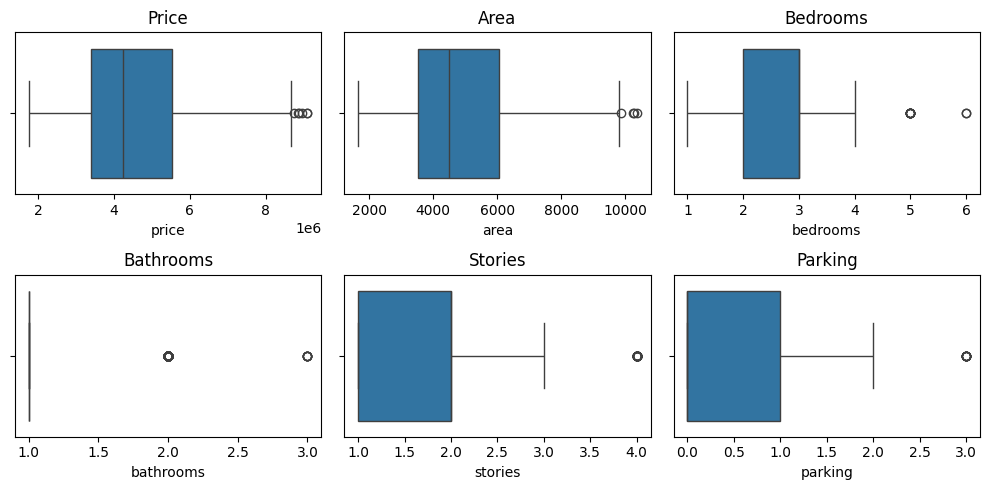

In [ ]:
dataSet.reset_index(drop = True, inplace = True)

# Plotting boxplots of numeric variables
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axs = plt.subplots(2, 3, figsize = (10, 5))

for i, attr in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data = dataSet[attr], ax = axs[row, col], orient = 'h')
    axs[row, col].set_title(attr.capitalize())

plt.tight_layout()
plt.show()

Categorical variables

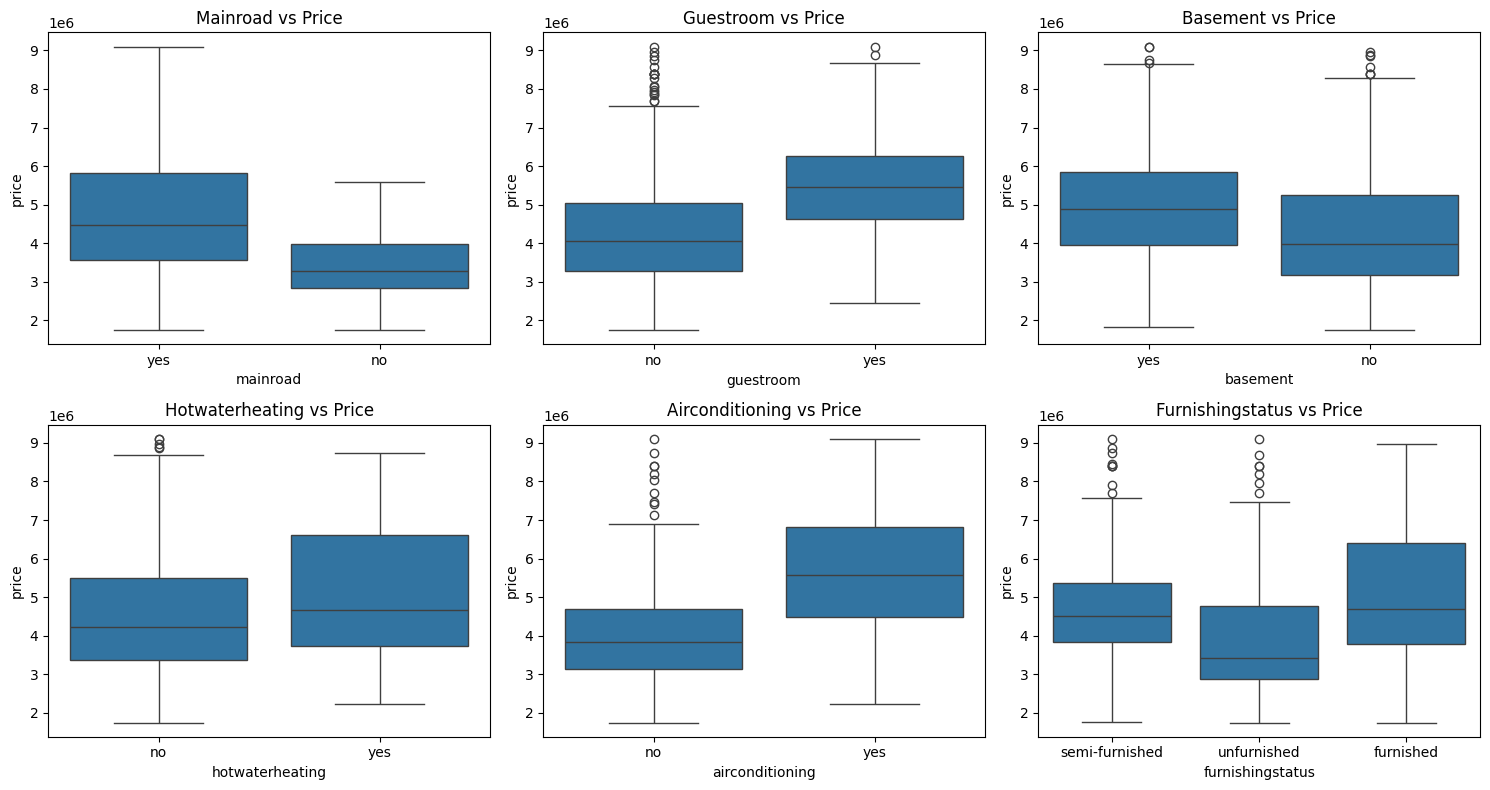

In [ ]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Define the dimensions of the subplot grid
num_rows = (len(categorical_columns) - 1) // 3 + 1
num_cols = min(len(categorical_columns), 3)

# Create a new figure and subplot grid
plt.figure(figsize=(15, 8))

for i, cat_col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=cat_col, y='price', data=dataSet)
    plt.title(f'{cat_col.capitalize()} vs Price')

plt.tight_layout()
plt.show()

#Bivariate Analysis


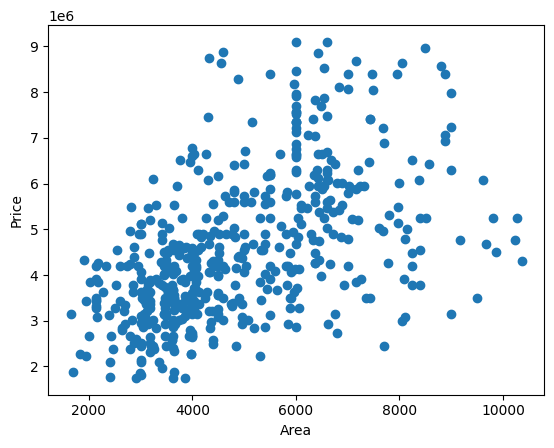

In [ ]:
# Scatter plot of 'area' vs. 'price'
plt.scatter(dataSet['area'], dataSet['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

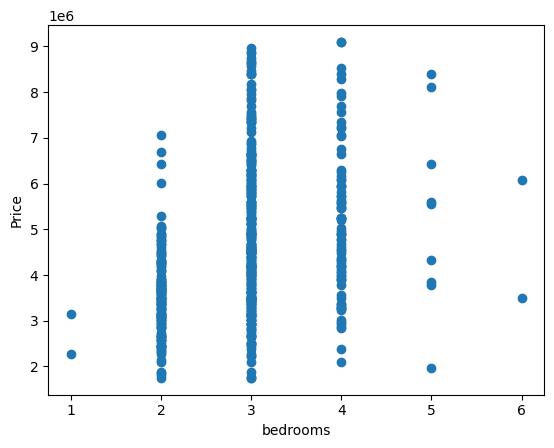

In [ ]:
# Scatter plot of 'bedrooms' vs. 'price'
plt.scatter(dataSet['bedrooms'], dataSet['price'])
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

# Data Preprocessing

In [ ]:
# List of variables to map
yes_no =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
dataSet[yes_no] = dataSet[yes_no].apply(binary_map)

In [ ]:
dataSet.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [ ]:
# Create dumies for the column
status = pd.get_dummies(dataSet['furnishingstatus'])

# Drop the first column of 'finished'
status = pd.get_dummies(dataSet['furnishingstatus'], drop_first = True)

# add 'status' to the dataset
dataSet = pd.concat([dataSet, status], axis = 1)

In [ ]:
# drop the 'furnishingstatus' column
dataSet.drop(['furnishingstatus'], axis = 1, inplace = True)

In [ ]:
dataSet.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


#Split Datasets

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

dataSetTrain, dataSetTest = train_test_split(dataSet, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
print("Train Data shape : ", dataSetTrain.shape)
print("Test Data shape : ", dataSetTest.shape)

Train Data shape :  (361, 14)
Test Data shape :  (156, 14)


In [ ]:
dataSetTrain.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
124,5600000,6360,3,1,3,1,0,0,0,0,0,1,1,0
209,4620000,2870,2,1,2,1,1,1,0,0,0,1,1,0
329,3773000,2520,5,2,1,0,0,1,0,1,1,0,0,0
397,3360000,3185,2,1,1,1,0,1,0,0,2,0,0,0
488,2450000,3240,2,1,1,0,1,0,0,0,1,0,0,1


In [ ]:
dataSetTest.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
217,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
260,4200000,5500,3,1,2,1,0,0,0,1,0,0,0,1
142,5320000,7800,3,1,1,1,0,1,0,1,2,1,0,1
152,5250000,8520,3,1,1,1,0,0,0,1,2,0,0,0
255,4270000,2175,3,1,2,0,1,1,0,1,0,0,0,1


#Feature Engineering

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Columns that need to be scaled
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

dataSetTrain[num_features] = scaler.fit_transform(dataSetTrain[num_features])

In [ ]:
dataSetTrain.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
124,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
209,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
329,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
397,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
488,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [ ]:
dataSetTrain.describe().T

,count,mean,std,min,25%,50%,75%,max
price,361.0,0.383701,0.209712,0.0,0.237143,0.338095,0.514286,1.0
area,361.0,0.350081,0.207184,0.0,0.189829,0.295092,0.491425,1.0
bedrooms,361.0,0.390582,0.149146,0.0,0.200000,0.400000,0.400000,1.0
bathrooms,361.0,0.127424,0.224465,0.0,0.000000,0.000000,0.000000,1.0
stories,361.0,0.268698,0.287833,0.0,0.000000,0.333333,0.333333,1.0
mainroad,361.0,0.875346,0.330784,0.0,1.000000,1.000000,1.000000,1.0
guestroom,361.0,0.168975,0.375250,0.0,0.000000,0.000000,0.000000,1.0
basement,361.0,0.349030,0.477325,0.0,0.000000,0.000000,1.000000,1.0
hotwaterheating,361.0,0.038781,0.193341,0.0,0.000000,0.000000,0.000000,1.0
airconditioning,361.0,0.313019,0.464366,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
# Separate the target variable from the training subset
Y_Train = dataSetTrain.pop('price')

# Extract the remaining features as the training data
X_Train = dataSetTrain

In [ ]:
Y_Train.head()

124    0.523810
209    0.390476
329    0.275238
397    0.219048
488    0.095238
Name: price, dtype: float64

# Model Building & Evaluation

In [ ]:
# Instantiate the Linear Regression Model
model = LinearRegression()

In [ ]:
# Fit the Model
model.fit(X_Train, Y_Train)

LinearRegression()

In [ ]:
# Columns that need to be scaled
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

dataSetTest[num_features] = scaler.fit_transform(dataSetTest[num_features])

In [ ]:
# Separate the target variable from the training subset
Y_Test = dataSetTest.pop('price')

# Extract the remaining features as the training data
X_Test = dataSetTest

In [ ]:
# Make Predictions on the Test Set
Y_Predict = model.predict(X_Test)

In [ ]:
# Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values.
# Lower values indicate better performance
mse = mean_squared_error(Y_Test, Y_Predict)
mse

0.01896921090059128

In [ ]:
# R-squared (R2) measures the proportion of the variance in the target variable that is predictable from the independent variables.
# A higher R2 value (closer to 1) indicates better model fit.
r2 = r2_score(Y_Test, Y_Predict)
r2

0.6569128677177845

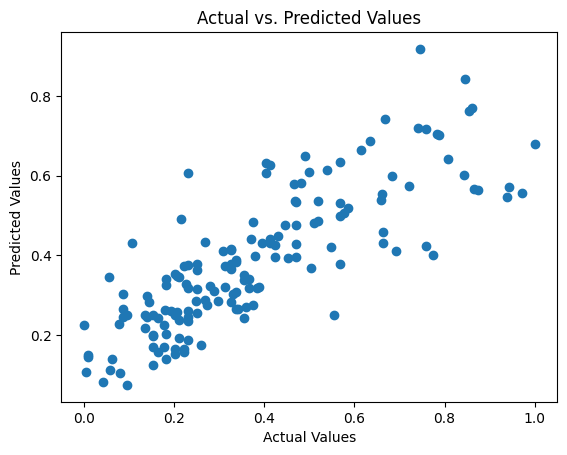

In [ ]:
# Scatter plot of actual vs. predicted values
plt.scatter(Y_Test, Y_Predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
#let's select some features to explore more
dataSet = dataSet[["price", "area"]]

In [ ]:
#generating training and testing data from our data
#we are using 80% data for training
train = dataSet[:(int((len(dataSet)*0.8)))]
test = dataSet[:(int((len(dataSet)*0.8))):]

In [ ]:
#using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["area"]])
train_y = np.array(train[["price"]])

regr.fit(train_x, train_y)

#the coefficients :
print ("cofficients : ",regr.coef_)
print ("Intercept : ",regr.intercept_)

cofficients :  [[386.06028899]]
Intercept :  [3045977.46748156]


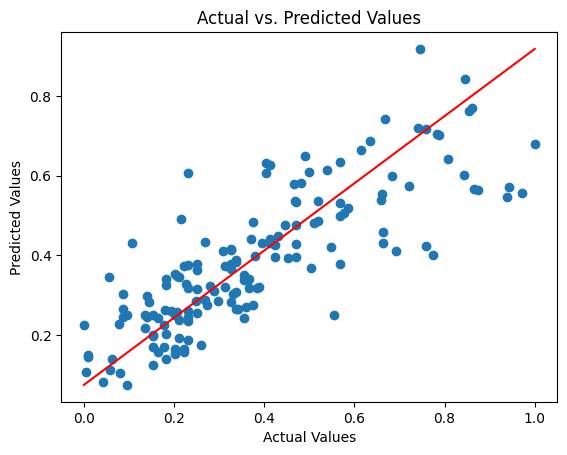

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(Y_Test, Y_Predict)
plt.plot([min(Y_Test), max(Y_Test)], [min(Y_Predict), max(Y_Predict)], color='red')  # diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [ ]:
# Assuming 'dataSet' contains your dataset
x = dataSet[['area']].values.reshape(-1, 1)  # Reshape to 2D array
y = dataSet['price']

# Split the data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Instantiate learning model
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(train_x_scaled, train_y)

# Predicting the test set results
y_pred = classifier.predict(test_x_scaled)

In [ ]:
x = dataSet['area']
y = dataSet['price']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Reshape train_x to a 2D array
train_x_2d = train_x.values.reshape(-1, 1)

# Instantiate learning model
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(train_x_2d, train_y)

# Predicting the test set results
# Reshape test_x to a 2D array if necessary
test_x_2d = test_x.values.reshape(-1, 1)
y_pred = classifier.predict(test_x_2d)

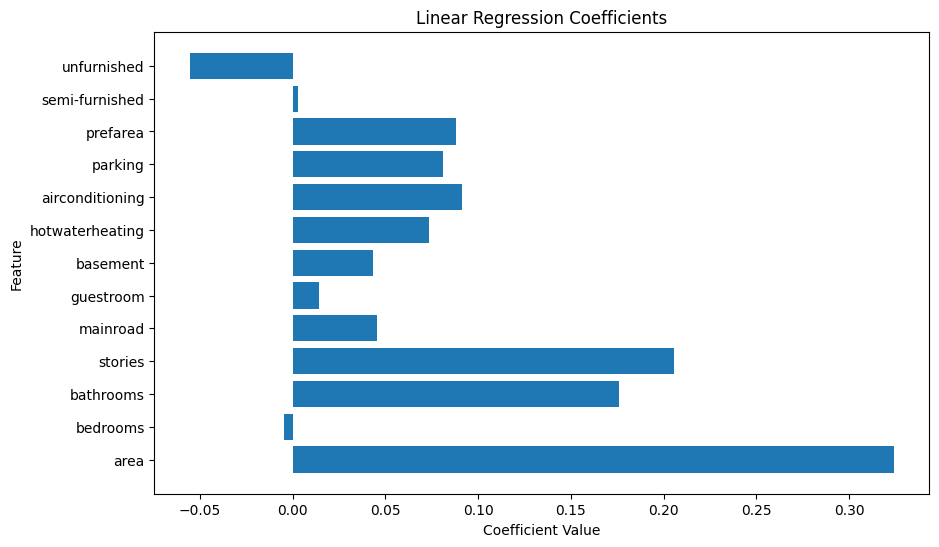

In [ ]:
# Access weights assigned to each feature
coefficients = model.coef_

# Get feature names from your DataFrame
feature_names = X_Train.columns

# Plot coefficients
plt.figure(figsize = (10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients")
plt.show()